## A3 Machine Learning
Done By:
- Nikhil Tyagi (B00809791)
- Aniruddha Chitley (B00808320)
- Nitish Bhardwaj (B00811535)

In [2]:
# Imports
import matplotlib.pyplot as plt
import random, pdb
import numpy as np
import tensorflow as tf
import time
import pandas as pd

#svm imports
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#Neural net import
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

#Linear classifier
from sklearn.linear_model import LogisticRegression

# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets.samples_generator import make_circles

# SYNTHETIC DATA CREATED USING CIRCLES

(1400, 2)


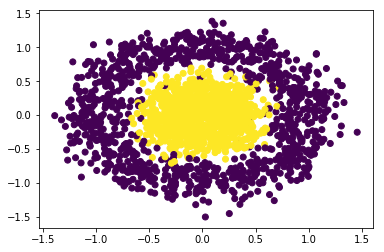

In [3]:
# Synthetic data using CIRLCES 
X, y = make_circles(n_samples=2000, noise=0.17, factor=0.3 , random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
plt.scatter(X[:,0], X[:,1], c=y)

# Neural Net algorithm using MLP Classifier

In [4]:
#Single Neural Net setting
neural_net = MLPClassifier(activation="logistic", solver="sgd", hidden_layer_sizes=(7,), random_state=1)
neural_net.fit(X_train, y_train)
neural_net.score(X_test,y_test)

0.505

In [5]:
## Learning rate, hidden layers & their sizes, activation function
parameters = {
    'activation': ['logistic'],
    'solver': ['sgd'],
    'max_iter': [100],
    'learning_rate_init': [0.001, 0.01, 0.1, 1],
    'hidden_layer_sizes': np.arange(2,10)
}
gscv = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv=5, return_train_score=True) # using all processors n_jobs=-1 (multicores)
gscv.fit(X_train, y_train)
print(gscv.score(X_test, y_test))
print(gscv.best_params_)

c:\users\aniruddha\anaconda3\envs\assignment3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9733333333333334
{'activation': 'logistic', 'hidden_layer_sizes': 9, 'learning_rate_init': 1, 'max_iter': 100, 'solver': 'sgd'}


c:\users\aniruddha\anaconda3\envs\assignment3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [6]:
df = pd.DataFrame(gscv.cv_results_)
df[['param_learning_rate_init','param_hidden_layer_sizes', 'mean_fit_time', 'mean_test_score']]

,param_learning_rate_init,param_hidden_layer_sizes,mean_fit_time,mean_test_score
0,0.001,2,0.335295,0.518571
1,0.01,2,0.068870,0.570714
2,0.1,2,0.206081,0.613571
3,1,2,0.277927,0.782143
4,0.001,3,0.217927,0.531429
5,0.01,3,0.069535,0.552143
6,0.1,3,0.121343,0.579286
7,1,3,0.396513,0.977857
8,0.001,4,0.219334,0.488571
9,0.01,4,0.057694,0.617143


#  SVM algorithm using SVC Classifier

In [11]:
# Grid search for SVC on CIRCLES data
parameters = {
    'kernel': ['rbf', 'sigmoid'],
    'C':[ 0.1, 100],
    'gamma':[10,1,0.1,0.01]
}
grid = GridSearchCV(svm.SVC(), param_grid=parameters, cv=2, n_jobs=-1)


grid.fit(X_train, y_train)
print(grid.score(X_test, y_test))
print(grid.best_params_)

0.9733333333333334
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [13]:
df = pd.DataFrame(grid.cv_results_)
df[['param_gamma','param_C', 'param_kernel', 'mean_fit_time', 'mean_test_score']]

c:\users\aniruddha\anaconda3\envs\assignment3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\aniruddha\anaconda3\envs\assignment3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\aniruddha\anaconda3\envs\assignment3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

,param_gamma,param_C,param_kernel,mean_fit_time,mean_test_score
0,10,0.1,rbf,0.006979,0.980000
1,10,0.1,sigmoid,0.030916,0.543571
2,1,0.1,rbf,0.006980,0.984286
3,1,0.1,sigmoid,0.032414,0.586429
4,0.1,0.1,rbf,0.019948,0.521429
5,0.1,0.1,sigmoid,0.021942,0.502143
6,0.01,0.1,rbf,0.023435,0.502143
7,0.01,0.1,sigmoid,0.023437,0.502143
8,10,100,rbf,0.006482,0.979286
9,10,100,sigmoid,0.017952,0.514286


# Random Forest algorithm using Random Forest Classifier

In [7]:
# Random Forests, grid search to find best parameter and run cross validation
parameters = {
    'n_estimators': [60,80,100],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)]
}
grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=2, n_jobs=-1)
grid_rfc.fit(X_train, y_train)
print(grid_rfc.score(X_test, y_test))
print(grid_rfc.best_params_)

0.9716666666666667
{'max_depth': 20, 'n_estimators': 100}


In [8]:
df = pd.DataFrame(grid_rfc.cv_results_)
df[['param_n_estimators','param_max_depth', 'mean_fit_time', 'mean_test_score']]

c:\users\aniruddha\anaconda3\envs\assignment3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\aniruddha\anaconda3\envs\assignment3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\aniruddha\anaconda3\envs\assignment3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

,param_n_estimators,param_max_depth,mean_fit_time,mean_test_score
0,60,10,0.123170,0.976429
1,80,10,0.127160,0.976429
2,100,10,0.182030,0.975714
3,60,20,0.144115,0.975714
4,80,20,0.125756,0.975000
5,100,20,0.209335,0.978571
6,60,30,0.121934,0.977857
7,80,30,0.163274,0.977143
8,100,30,0.161017,0.975714
9,60,40,0.091747,0.977143


# Logistic Regression algorithm using Logistic Regression Classifier

In [9]:
# Linear Classifier
parameters = {
    'solver': ['sag', 'lbfgs'],
    'multi_class': ['ovr']
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid=parameters, cv=2, n_jobs=-1)

lc = LogisticRegression(solver='sag', multi_class='ovr')

grid_lr.fit(X_train, y_train)
print(grid_lr.score(X_test, y_test))
print(grid_lr.best_params_)

0.5566666666666666
{'multi_class': 'ovr', 'solver': 'sag'}


In [10]:
df = pd.DataFrame(grid_lr.cv_results_)
df[['param_solver','param_multi_class', 'mean_fit_time', 'mean_test_score']]

c:\users\aniruddha\anaconda3\envs\assignment3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\aniruddha\anaconda3\envs\assignment3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\aniruddha\anaconda3\envs\assignment3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

,param_solver,param_multi_class,mean_fit_time,mean_test_score
0,sag,ovr,0.016461,0.542143
1,lbfgs,ovr,0.007477,0.542143
